In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies = pd.read_csv("movies.csv")
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [3]:
ratings = pd.read_csv("ratings.csv")
ratings.head(2)

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807


### Basic Information and summary statistics

In [4]:

print("Movies DataFrame info:")
print(movies.info())

Movies DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB
None


In [5]:
print("Rating DataFrame Info:")
print(ratings.info())

Rating DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB
None


In [6]:
print("Movies DataFrame Summary:")
print(movies.describe())

Movies DataFrame Summary:
             movieId
count   10329.000000
mean    31924.282893
std     37734.741149
min         1.000000
25%      3240.000000
50%      7088.000000
75%     59900.000000
max    149532.000000


In [7]:
print("Ratings DataFrame Summary:")
print(ratings.describe())

Ratings DataFrame Summary:
              userId        movieId         rating     timestamp
count  105339.000000  105339.000000  105339.000000  1.053390e+05
mean      364.924539   13381.312477       3.516850  1.130424e+09
std       197.486905   26170.456869       1.044872  1.802660e+08
min         1.000000       1.000000       0.500000  8.285650e+08
25%       192.000000    1073.000000       3.000000  9.711008e+08
50%       383.000000    2497.000000       3.500000  1.115154e+09
75%       557.000000    5991.000000       4.000000  1.275496e+09
max       668.000000  149532.000000       5.000000  1.452405e+09


### Distribution of ratings

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


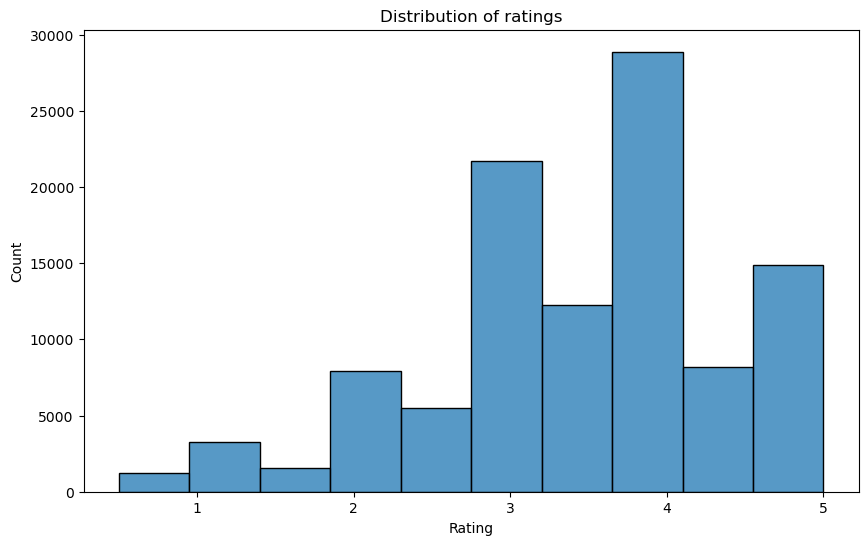

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(ratings['rating'],bins = 10, kde = False)
plt.title("Distribution of ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [9]:
#Unique User and movie
unique_users = ratings["userId"].nunique()
unique_movies = ratings["movieId"].nunique()
print(f'Number of unique users:{unique_users}')
print(f'Number of unique movies:{unique_movies}')

Number of unique users:668
Number of unique movies:10325


In [49]:
#Split genres into seprate rows
movies_expanded = movies.assign(genres=movies['genres'].str.split('|')).explode('genres')
movies_expanded

,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


In [50]:
#Merge with ratings
merged_df = ratings.merge(movies_expanded, on="movieId")
merged_df

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime
1,1,16,4.0,1217897793,Casino (1995),Drama
2,9,16,4.0,842686699,Casino (1995),Crime
3,9,16,4.0,842686699,Casino (1995),Drama
4,12,16,1.5,1144396284,Casino (1995),Crime
...,...,...,...,...,...,...
281899,668,140816,2.5,1443288791,Tangerine (2015),Comedy
281900,668,140816,2.5,1443288791,Tangerine (2015),Drama
281901,668,141472,2.5,1442679119,The 50 Year Argument (2014),(no genres listed)
281902,668,142488,4.0,1451535844,Spotlight (2015),Thriller


In [51]:
#Calculate avg rating and total movies at genre level
genre_stats = merged_df.groupby("genres").agg(
    avg_rating=('rating','mean'),
    total_movies=("movieId",'nunique')).reset_index()
print(genre_stats)


                genres  avg_rating  total_movies
0   (no genres listed)    3.071429             7
1               Action    3.451450          1737
2            Adventure    3.518027          1164
3            Animation    3.635350           400
4             Children    3.439429           540
5               Comedy    3.420996          3513
6                Crime    3.642392          1440
7          Documentary    3.643035           415
8                Drama    3.650266          5218
9              Fantasy    3.500459           670
10           Film-Noir    3.913636           195
11              Horror    3.281097          1001
12                IMAX    3.641821           152
13             Musical    3.571962           409
14             Mystery    3.652043           675
15             Romance    3.544255          1788
16              Sci-Fi    3.454481           859
17            Thriller    3.495561          2187
18                 War    3.783202           503
19             Weste

In [52]:
#Popularity-Based Recommender System
def popularity_based_recommender(genre,min_reviews,num_recommendations):
    genre_movies = merged_df[merged_df['genres'] == genre]
    genre_movies_stats = genre_movies.groupby('title').agg(
        avg_rating=('rating','mean'),
        num_reviews=('rating','count')
    ).reset_index()
    filtered_movies = genre_movies_stats[genre_movies_stats['num_reviews']>=min_reviews]
    sorted_movies = filtered_movies.sort_values(by='avg_rating',ascending=False)
    return sorted_movies.head(num_recommendations)
    

In [66]:
#Content-Based Recommender system
def contet_based_recommender(movie_title,num_recommendation):
    target_movie_genres = movies[movies['title'] == movie_title]['genres'].iloc[0].split('|')
    similar_movies = movies[movies['genres'].apply(lambda x: any(genre in x.split('|') for genre in target_movie_genres))]
    return similar_movies.head(num_recommendation)

In [67]:
#Collaborative-Based Recommender System
from sklearn.metrics.pairwise import cosine_similarity

In [68]:
def collaborative_based_recommender(user_id, num_recommendations, num_similar_users):
    user_movie_matrix = ratings.pivot(index='userId', columns='movieId', values='rating').fillna(0)
    user_similarity = cosine_similarity(user_movie_matrix)
    user_similarity_df = pd.DataFrame(user_similarity, index=user_movie_matrix.index, columns=user_movie_matrix.index)
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).head(num_similar_users).index
    similar_user_ratings = ratings[ratings['userId'].isin(similar_users)]
    top_movies = similar_user_ratings.groupby('movieId').agg(
        avg_rating = ('rating', 'mean'),
        num_rating = ("rating", 'count')
    ).reset_index()
    top_movies = top_movies.sort_values(by='avg_rating',ascending=False)
    recommended_movies = movies[movies['movieId'].isin(top_movies.head(num_recommendations)['movieId'])]
    return recommended_movies

In [69]:
#Example Usage

In [70]:
print(popularity_based_recommender('Comedy',100,3))

                                       title  avg_rating  num_reviews
2093  Monty Python and the Holy Grail (1975)    4.301948          154
995                             Fargo (1996)    4.271144          201
2498              Princess Bride, The (1987)    4.163743          171


In [71]:
print(contet_based_recommender("Toy Story (1995)",2))

   movieId             title                                       genres
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
1        2    Jumanji (1995)                   Adventure|Children|Fantasy


In [72]:
print(collaborative_based_recommender(1,5,100))

      movieId                                   title                genres
1754     2202                         Lifeboat (1944)             Drama|War
4861     6630  Inn of the Sixth Happiness, The (1958)       Adventure|Drama
6469    31437  Nobody Knows (Dare mo shiranai) (2004)                 Drama
6785    39052    Star Wreck: In the Pirkinning (2005)  Action|Comedy|Sci-Fi
8102    68522                            Earth (2007)           Documentary
